<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/FINDING__k_value_AND_cluster2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-MEANS CLUSTERING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
data= pd.read_csv('/content/MOBILE PRICE PREDICTION.csv')
print(data)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   
406  Samsung    Galaxy S10 Lite      128      6                  6.7   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [ ]:
data.head(10)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
5,Apple,iPhone 13,128 GB,4 GB,6.1,12 + 12,2815,799
6,Samsung,Galaxy Z Flip3,256 GB,8 GB,6.7,12 + 12,3300,999
7,Xiaomi,Poco X3 Pro,128 GB,6 GB,6.67,48 + 8 + 2 + 2,5160,249
8,Oppo,Reno6 Pro+ 5G,128 GB,8 GB,6.55,50 + 13 + 16 + 2,4500,699
9,Vivo,X70 Pro+,256 GB,12 GB,6.78,50 + 48 + 12 + 8,4500,1199


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [ ]:
data.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [ ]:
data.duplicated().sum()

26

In [ ]:
data1=data.drop_duplicates()
print(data1)

       Brand              Model Storage    RAM  Screen Size (inches)  \
0      Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1    Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2    OnePlus              9 Pro   128 GB   8 GB                  6.7   
3     Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4     Google            Pixel 6   128 GB   8 GB                  6.4   
..       ...                ...      ...    ...                  ...   
401   Huawei           P30 Lite      128      4                 6.15   
402  Samsung   Galaxy Note20 5G      128      8                  6.7   
403   Xiaomi      Mi 10 Lite 5G      128      6                 6.57   
404    Apple  iPhone 12 Pro Max      128      6                  6.7   
405     Oppo              Reno3      128      8                  6.4   

            Camera (MP)  Battery Capacity (mAh) Price ($)  
0          12 + 12 + 12                    3095       999  
1    108 + 10 +

In [ ]:
# Assuming df is your DataFrame
# First, identify columns with categorical data
categorical_cols = data1.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and encode the values
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

# Now, data contains the encoded values for categorical columns
print(data1)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

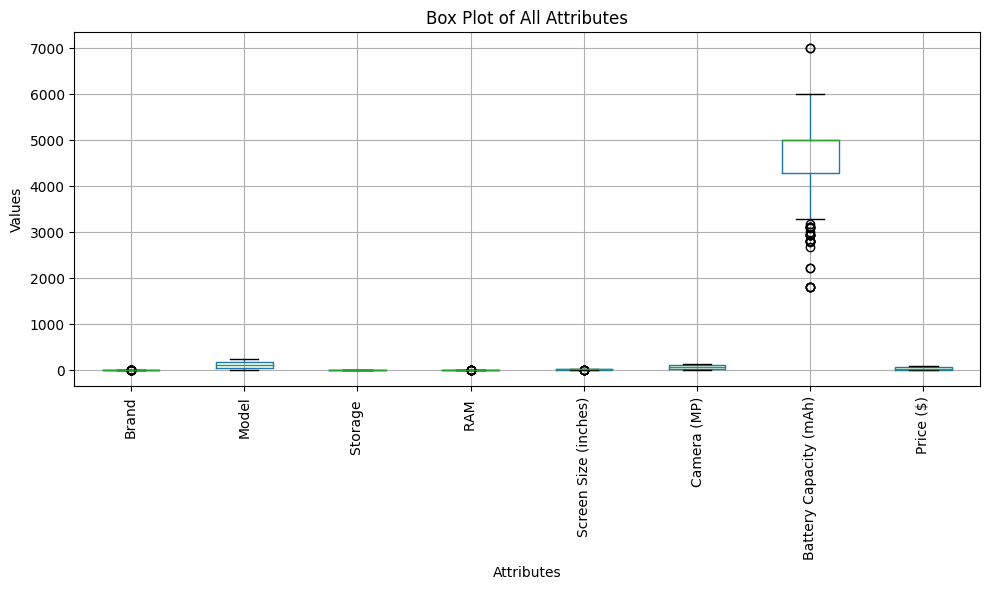

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data1.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [ ]:
# Handling outliers
def handle_outliers(data1, threshold=3):
    numerical_columns = data1.select_dtypes(include=np.number).columns
    for column in numerical_columns:
        z_scores = np.abs((data1[column] - data1[column].mean()) / data1[column].std())
        data1 = data1[z_scores < threshold]
    return data1

# Call the function to handle outliers
cleaned_data = handle_outliers(data1=data1)
print(cleaned_data)

     Brand  Model  Storage   RAM   Screen Size (inches)  Camera (MP)  \
0        0    232         1    15                     8           15   
1       12    100         4     1                    35            0   
2        9     19         1    18                    31           53   
3       15    178         1    15                    30          119   
4        4    162         1    18                    15           87   
..     ...    ...       ...   ...                   ...          ...   
401      5    155         0    10                     9           69   
402     12     95         0    17                    31           19   
403     15    111         0    14                    26           70   
404      0    229         0    14                    31           17   
405     10    188         0    17                    15           59   

     Battery Capacity (mAh)  Price ($)  
0                      3095         88  
1                      5000         45  
2           

In [ ]:
# Select any four features from the dataset
selected_features = ['Screen Size (inches)', 'Camera (MP)','Battery Capacity (mAh)','Price ($)']

# Create an array with 100 rows and 2 columns containing the values of the selected features
selected_values = cleaned_data[selected_features].values[:375]

# Check the shape of the array
print(selected_values.shape)

(375, 4)


In [ ]:
#define the model
kmeans_model = KMeans(n_clusters=4)
#train the model
kmeans_model.fit(selected_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# To ge the centers of cluster
kmeans_model.cluster_centers_

array([[  23.71186441,   72.75706215, 5002.25988701,   31.70621469],
       [  21.40458015,   80.78625954, 4271.18320611,   51.03816794],
       [  22.70731707,   80.68292683, 6048.7804878 ,   27.29268293],
       [   9.57692308,   23.19230769, 3074.03846154,   67.96153846]])

In [ ]:
inertia = kmeans_model.inertia_
print(inertia)

10840488.797592558


In [ ]:
#The Silhouette Coefficient is a measure of the similarity of a point with the points of the same
#cluster, and its dissimilarity with the points of other clusters. (Range between -1 to 1]
silhouette_score = metrics.silhouette_score(selected_values, kmeans_model.labels_)
print(silhouette_score)

0.7797709250609335


## **FINDING K-MEAN CLUSTER FOR MORE THEN TWO FEATURES**

In [ ]:
# pandas DataFrame object named df from the data generated earlier using make_blobs
df = pd.DataFrame(cleaned_data, columns=['Screen Size (inches)', 'Camera (MP)','Battery Capacity (mAh)','Price ($)'])
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(df[['Screen Size (inches)', 'Camera (MP)','Battery Capacity (mAh)','Price ($)']])
df['Cluster'] = y
print(df.head(20))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Screen Size (inches)  Camera (MP)  Battery Capacity (mAh)  Price ($)  \
0                      8           15                    3095         88   
1                     35            0                    5000         45   
2                     31           53                    4500         85   
3                     30          119                    5020         63   
4                     15           87                    4614         84   
5                      8           14                    2815         84   
6                     31           14                    3300         88   
7                     30           54                    5160         60   
8                     24           88                    4500         81   
9                     34           91                    4500         45   
10                    16          116                    4500         66   
11                    20          112                    4500         74   
12          